In [1]:
!pip install seaborn


In [2]:
# Importação de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import torch
import torch.nn as nn

# Configuração geral
plt.style.use('ggplot')  # Alternativa ao estilo 'seaborn'
sns.set_theme(style="whitegrid")  # Configuração padrão do Seaborn


In [3]:
# Carregando o dataset
df_new = pd.read_csv("/content/dataset expandido.csv")

# Visualizando as primeiras linhas
print(df_new.head())

# Verificando os tipos de dados e valores ausentes
print(df_new.info())
print(df_new.isnull().sum())


   YEAR  DOY  HR  ID for SW Plasma spacecraft  Scalar B, nT  \
0  2000    1   0                           99           6.5   
1  2000    2   0                           99           5.1   
2  2000    3   0                           99           4.9   
3  2000    4   0                           99           5.8   
4  2000    5   0                           99           6.0   

   Vector B Magnitude,nT BY, nT (GSM)  BZ, nT (GSM)  RMS_magnitude, nT  \
0                    4.3          2.9           0.0                0.6   
1                    3.0          1.3           0.4                0.5   
2                    3.7          2.5          -0.1                0.5   
3                    4.1          3.1          -0.6                0.6   
4                    4.0          2.0          -1.6                0.3   

   RMS_field_vector, nT  ...  f10.7_index  pc-index Lyman_alpha  \
0                   2.9  ...        125.6       2.9    0.007890   
1                   2.7  ...        128.5 

In [4]:
# Identificar colunas numéricas
numeric_columns = df_new.columns.difference(['YEAR', 'DOY', 'HR', 'ID for SW Plasma spacecraft'])

# Verificar quais linhas têm valores não numéricos
invalid_rows = df_new[numeric_columns].apply(pd.to_numeric, errors='coerce').isnull()

# Marcar linhas com valores inválidos
invalid_mask = invalid_rows.any(axis=1)

# Exibir um resumo das linhas inválidas
print("Número de linhas com valores inválidos:", invalid_mask.sum())
print("Exemplo de linhas com valores inválidos:")
print(df_new[invalid_mask].head())

# Remover linhas inválidas
df_cleaned = df_new[~invalid_mask]

# Exibir um resumo do dataset limpo
print("Número de linhas após limpeza:", len(df_cleaned))


Número de linhas com valores inválidos: 196
Exemplo de linhas com valores inválidos:
     YEAR  DOY  HR  ID for SW Plasma spacecraft  Scalar B, nT  \
95   2000   96   0                           99           7.3   
96   2000   97   0                           99          12.5   
104  2000    5   0                           99           6.6   
130  2000   31   0                           99           5.0   
159  2000   60   0                           99          12.8   

     Vector B Magnitude,nT BY, nT (GSM)  BZ, nT (GSM)  RMS_magnitude, nT  \
95                     5.1          2.6           1.5                1.2   
96                    10.5         -4.9          -8.7                9.2   
104                    6.3          2.7          -0.1                0.8   
130                    4.0         -2.7          -2.5                0.3   
159                    8.1          4.9          -0.7                5.6   

     RMS_field_vector, nT  ...  f10.7_index  pc-index  Lyman_alpha 

In [5]:
# Verificar os nomes das colunas
print(df_cleaned.columns)

# Garantir que o 'Kp index' está presente e é numérico
assert 'Kp index' in df_cleaned.columns, "A coluna 'Kp index' é necessária."
df_cleaned['Kp index'] = pd.to_numeric(df_cleaned['Kp index'], errors='coerce')


Index(['YEAR', 'DOY', 'HR', 'ID for SW Plasma spacecraft', 'Scalar B, nT',
       'Vector B Magnitude,nT', 'BY, nT (GSM)', 'BZ, nT (GSM)',
       'RMS_magnitude, nT', 'RMS_field_vector, nT', 'SW Plasma Temperature, K',
       'SW Proton Density, N/cm^3', 'SW Plasma Speed, km/s', 'sigma-T,K',
       'sigma-n, N/cm^3)', 'sigma-V, km/s', 'Flow pressure',
       'E elecrtric field ', 'Plasma betta', 'Alfen mach number',
       'Magnetosonic Much num.', 'Quasy-Invariant', 'Kp index',
       'R (Sunspot No.)', 'Dst-index, nT', 'ap_index, nT', 'f10.7_index',
       'pc-index', 'Lyman_alpha', 'Proton flux (>1 Mev)',
       'Proton flux (>2 Mev)', 'Proton flux (>4 Mev)', 'Proton flux (>10 Mev)',
       'Proton flux (>30 Mev)', 'Proton flux (>60 Mev)', 'Flux FLAG'],
      dtype='object')


<ipython-input-5-877da4067428>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Kp index'] = pd.to_numeric(df_cleaned['Kp index'], errors='coerce')


Correlação com Kp index:
Kp index                       1.000000
ap_index, nT                   0.899143
Flow pressure                  0.541546
SW Plasma Temperature, K       0.530833
RMS_magnitude, nT              0.391263
Scalar B, nT                   0.254173
f10.7_index                    0.183275
R (Sunspot No.)                0.182136
RMS_field_vector, nT           0.166396
Vector B Magnitude,nT          0.154493
sigma-n, N/cm^3)               0.147680
pc-index                       0.139932
Proton flux (>60 Mev)          0.080532
DOY                            0.024942
SW Proton Density, N/cm^3      0.001662
Quasy-Invariant               -0.004506
BZ, nT (GSM)                  -0.057291
Magnetosonic Much num.        -0.067929
Alfen mach number             -0.150601
Plasma betta                  -0.384053
Dst-index, nT                 -0.469831
HR                                  NaN
ID for SW Plasma spacecraft         NaN
Flux FLAG                           NaN
Name: Kp index,

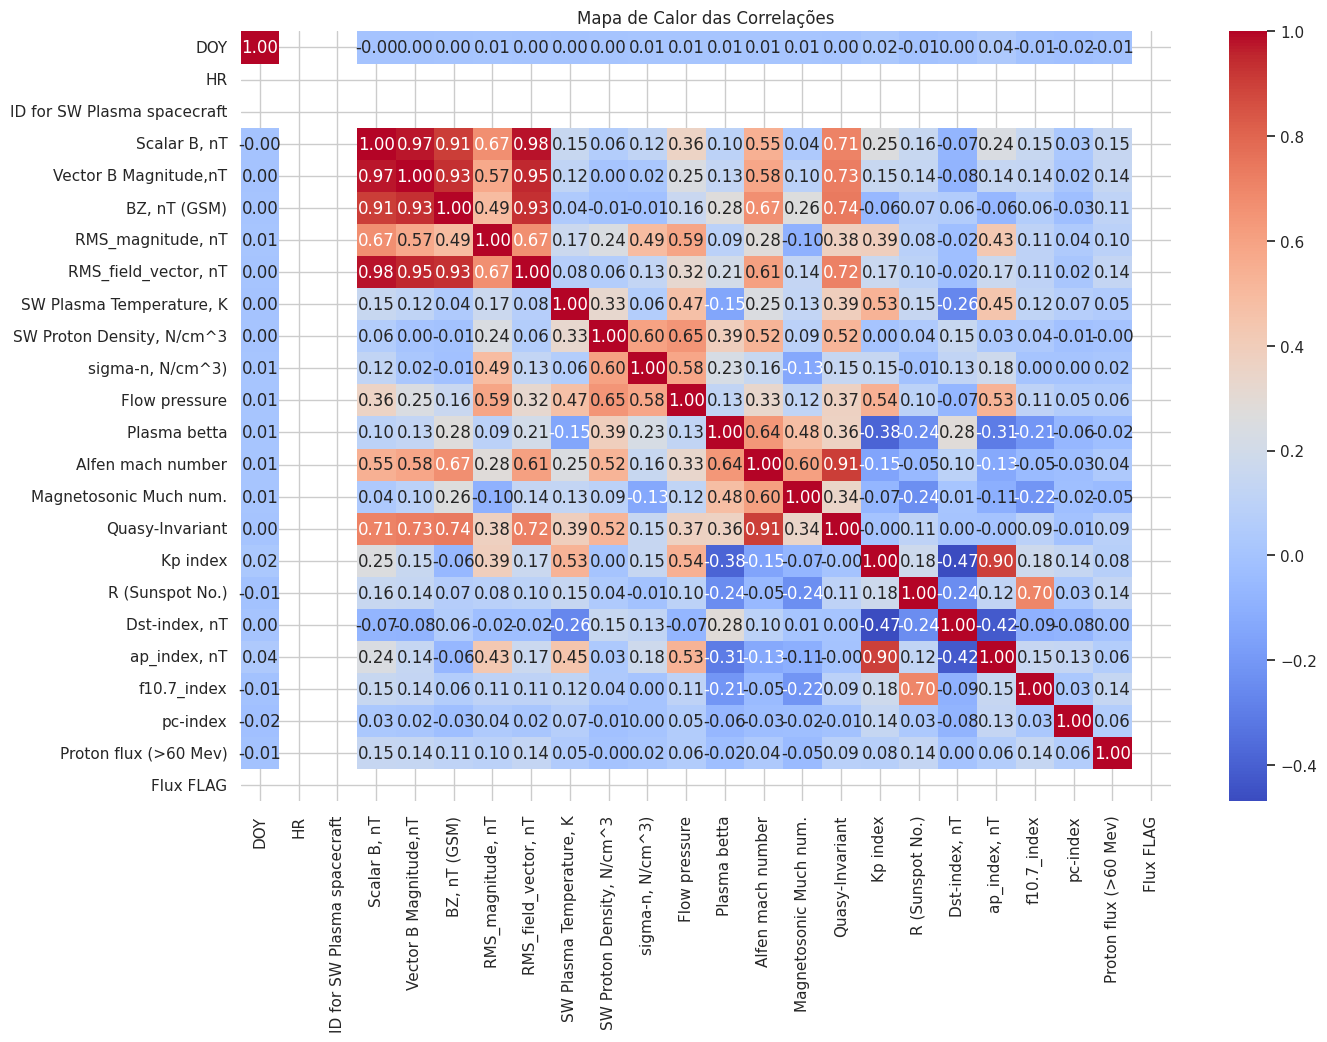

In [6]:
# Selecionar apenas colunas numéricas (excluindo identificadores como YEAR, DOY, HR)
numeric_columns = df_cleaned.select_dtypes(include=[np.number]).columns

# Calcular correlações com o Kp index
correlations = df_cleaned[numeric_columns].corr()

# Visualizar a correlação do Kp index com outras variáveis
print("Correlação com Kp index:")
print(correlations['Kp index'].sort_values(ascending=False))

# Visualizar o mapa de calor
plt.figure(figsize=(15, 10))
sns.heatmap(correlations, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de Calor das Correlações")
plt.show()


In [7]:
# Manter apenas os 4 primeiros caracteres em YEAR
df_cleaned['YEAR'] = df_cleaned['YEAR'].astype(str).str.strip().str.slice(0, 4)

# Converter YEAR, DOY e HR para inteiros
df_cleaned['YEAR'] = df_cleaned['YEAR'].astype(int)
df_cleaned['DOY'] = df_cleaned['DOY'].astype(int)
df_cleaned['HR'] = df_cleaned['HR'].astype(int)

# Criar a coluna 'datetime' a partir de YEAR, DOY e HR
df_cleaned['datetime'] = pd.to_datetime(
    df_cleaned['YEAR'], format='%Y'
) + pd.to_timedelta(df_cleaned['DOY'] - 1, unit='D') + pd.to_timedelta(df_cleaned['HR'], unit='h')

# Verificar a nova coluna datetime
print(df_cleaned[['YEAR', 'DOY', 'HR', 'datetime']].head())

# Criar a coluna 'G1_event' com base no 'Kp index'
df_cleaned['G1_event'] = (df_cleaned['Kp index'] >= 5).astype(int)

# Verificar os valores criados
print(df_cleaned['G1_event'].value_counts())


   YEAR  DOY  HR   datetime
0  2000    1   0 2000-01-01
1  2000    2   0 2000-01-02
2  2000    3   0 2000-01-03
3  2000    4   0 2000-01-04
4  2000    5   0 2000-01-05
G1_event
1    7761
0     819
Name: count, dtype: int64


<ipython-input-7-d366fc7d5c8a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['YEAR'] = df_cleaned['YEAR'].astype(str).str.strip().str.slice(0, 4)
<ipython-input-7-d366fc7d5c8a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['YEAR'] = df_cleaned['YEAR'].astype(int)
<ipython-input-7-d366fc7d5c8a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

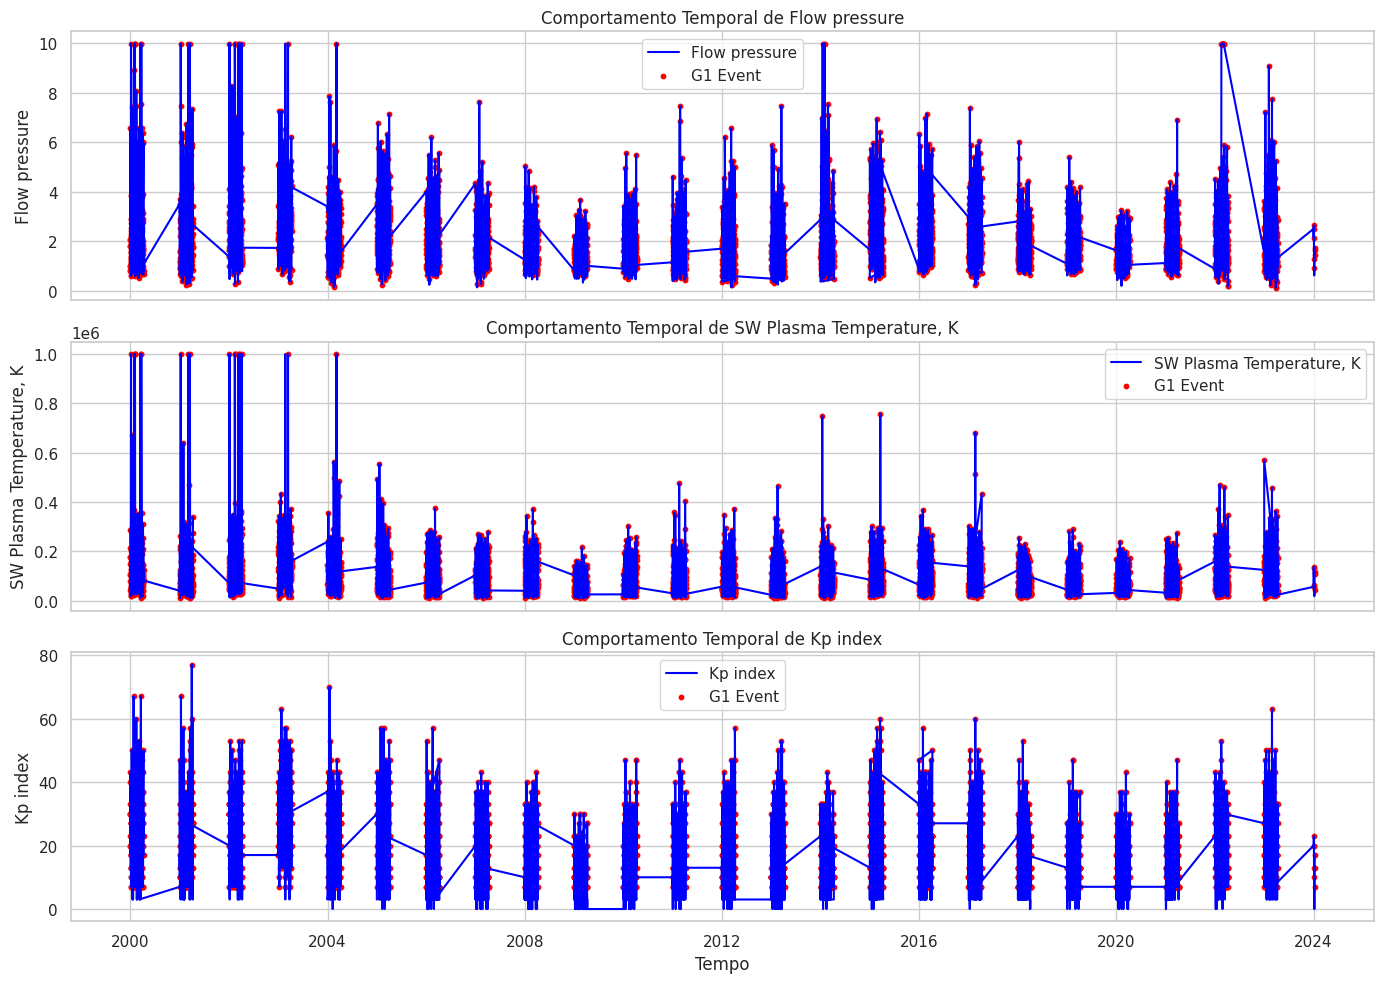

In [8]:
# Seleção de variáveis para análise
variables_to_plot = ['Flow pressure', 'SW Plasma Temperature, K', 'Kp index']

# Configuração do tamanho do gráfico
fig, axes = plt.subplots(len(variables_to_plot), 1, figsize=(14, 10), sharex=True)

# Plotar cada variável
for i, var in enumerate(variables_to_plot):
    axes[i].plot(df_cleaned['datetime'], df_cleaned[var], label=var, color='blue')
    axes[i].scatter(df_cleaned.loc[df_cleaned['G1_event'] == 1, 'datetime'],
                    df_cleaned.loc[df_cleaned['G1_event'] == 1, var],
                    color='red', label='G1 Event', s=10)
    axes[i].legend()
    axes[i].set_ylabel(var)
    axes[i].set_title(f"Comportamento Temporal de {var}")

# Configurar rótulo do eixo x
plt.xlabel("Tempo")
plt.tight_layout()
plt.show()


In [9]:
# Definir janela de antecedência (ex.: 6 horas antes de eventos G1)
window = 6  # Horas

# Listas para armazenar valores antes dos eventos G1
flow_pressure_before_g1 = []
temperature_before_g1 = []

# Iterar sobre os índices dos eventos G1
g1_indices = df_cleaned[df_cleaned['G1_event'] == 1].index

for idx in g1_indices:
    if idx - window >= 0:
        flow_pressure_before_g1.append(df_cleaned.loc[idx - window:idx, 'Flow pressure'].mean())
        temperature_before_g1.append(df_cleaned.loc[idx - window:idx, 'SW Plasma Temperature, K'].mean())

# Médias antes dos eventos G1
print("Média do Flow Pressure antes de eventos G1:")
print(flow_pressure_before_g1)
print("Média do SW Plasma Temperature antes de eventos G1:")
print(temperature_before_g1)


Média do Flow Pressure antes de eventos G1:
[1.7214285714285715, 1.552857142857143, 1.4785714285714289, 1.6171428571428572, 1.9428571428571428, 2.0157142857142856, 1.8957142857142857, 1.9014285714285712, 1.93, 1.897142857142857, 1.6542857142857141, 1.2142857142857142, 1.44, 1.6528571428571428, 2.2328571428571427, 2.567142857142857, 2.61, 2.6942857142857144, 2.5085714285714285, 3.36, 3.577142857142857, 3.0799999999999996, 2.8971428571428572, 3.0028571428571427, 3.0228571428571427, 2.975714285714286, 1.9814285714285715, 1.82, 2.0, 2.3614285714285717, 2.4371428571428573, 2.4699999999999998, 2.4585714285714286, 2.3942857142857146, 2.542857142857143, 3.157142857142857, 2.781428571428571, 2.994285714285714, 3.1928571428571426, 3.224285714285714, 3.151428571428572, 1.9957142857142856, 1.9942857142857142, 2.244285714285714, 2.1042857142857145, 2.491428571428571, 3.2085714285714286, 3.3300000000000005, 3.4728571428571433, 3.442857142857143, 2.812857142857143, 2.6700000000000004, 2.31, 1.6528571

count    8.580000e+03
mean     2.297541e+05
std      5.763528e+05
min      4.658800e+03
25%      5.557665e+04
50%      1.136597e+05
75%      2.494945e+05
max      9.989990e+06
Name: Combined Indicator, dtype: float64


<ipython-input-10-c2afacba6051>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Combined Indicator'] = df_cleaned['Flow pressure'] * df_cleaned['SW Plasma Temperature, K']


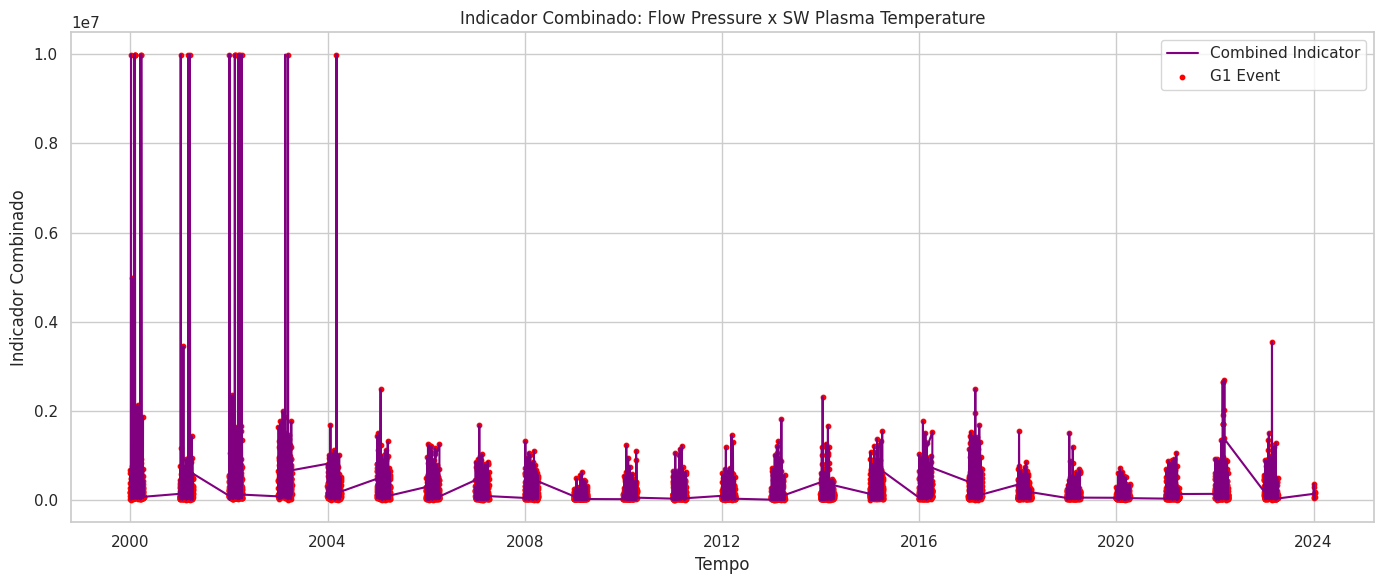

In [10]:
# Criar um indicador combinado
df_cleaned['Combined Indicator'] = df_cleaned['Flow pressure'] * df_cleaned['SW Plasma Temperature, K']

# Verificar estatísticas básicas
print(df_cleaned['Combined Indicator'].describe())

# Plotar o indicador combinado ao longo do tempo
plt.figure(figsize=(14, 6))
plt.plot(df_cleaned['datetime'], df_cleaned['Combined Indicator'], label='Combined Indicator', color='purple')
plt.scatter(df_cleaned.loc[df_cleaned['G1_event'] == 1, 'datetime'],
            df_cleaned.loc[df_cleaned['G1_event'] == 1, 'Combined Indicator'],
            color='red', label='G1 Event', s=10)
plt.legend()
plt.title("Indicador Combinado: Flow Pressure x SW Plasma Temperature")
plt.xlabel("Tempo")
plt.ylabel("Indicador Combinado")
plt.tight_layout()
plt.show()


In [11]:
# Definir janela de antecedência (ex.: 30 horas antes de eventos G1)
window = 30  # Horas

# Listas para armazenar valores antes dos eventos G1
combined_before_g1 = []

# Iterar sobre os índices dos eventos G1
g1_indices = df_cleaned[df_cleaned['G1_event'] == 1].index

for idx in g1_indices:
    if idx - window >= 0:
        combined_before_g1.append(df_cleaned.loc[idx - window:idx, 'Combined Indicator'].mean())

# Exibir resultados
print("Média do Indicador Combinado antes de eventos G1:")
print(combined_before_g1)


Média do Indicador Combinado antes de eventos G1:
[307257.5983870968, 294031.37129032257, 285514.9967741935, 282159.1619354839, 276836.04354838707, 277858.9229032258, 306936.71, 315983.2570967742, 320908.2019354838, 324124.9112903226, 323399.3887096774, 309036.06258064514, 325270.3551612903, 327622.2467741935, 347831.5519354839, 351644.40548387094, 352768.50193548383, 353900.9377419354, 349061.6438709677, 341496.432580645, 354856.5009677418, 343650.4851612902, 349031.15354838705, 415607.458064516, 425248.1961290322, 432589.88258064515, 400588.91806451615, 378324.87225806457, 367314.6261290323, 357152.62096774194, 353046.8370967742, 350340.2435483871, 349010.58451612905, 346349.2380645161, 352265.08806451614, 351430.8174193549, 311373.8283870968, 299884.6477419355, 295323.3309677419, 292353.9696774193, 300526.7896774193, 291059.4190322579, 261517.06516129037, 1186926.7758064514, 1191920.8677419354, 1193966.350967742, 1196389.0790322581, 1200562.955483871, 1224793.0254838709, 1222627.674

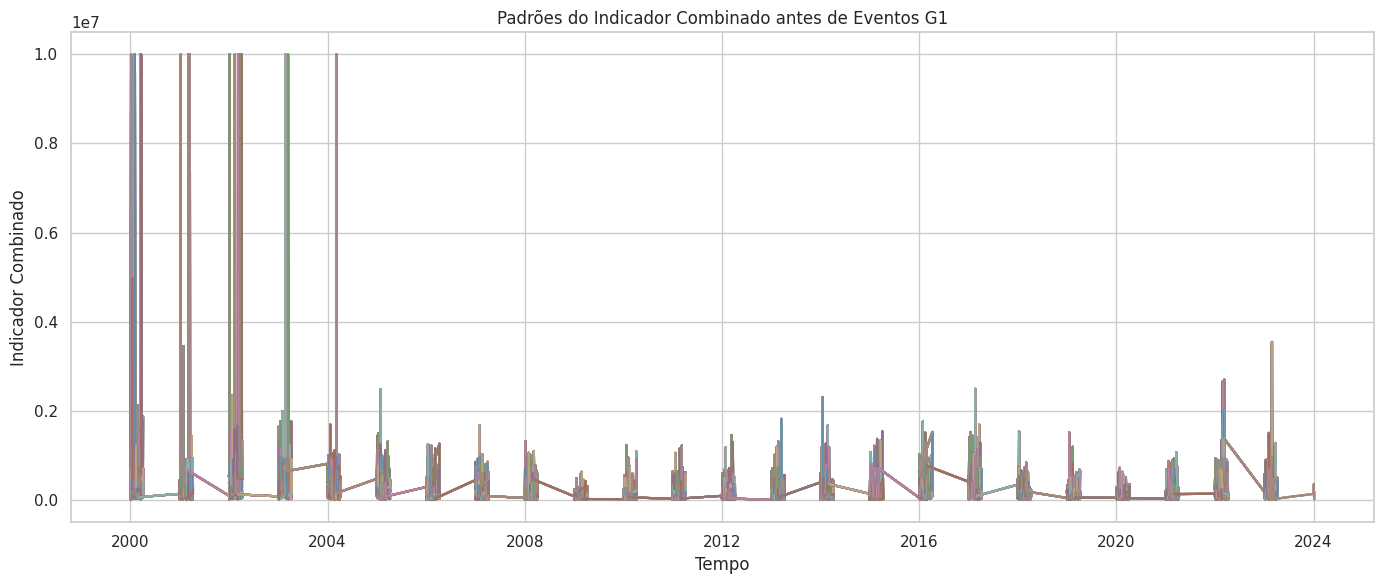

In [12]:
# Plotar o comportamento antes dos eventos G1
plt.figure(figsize=(14, 6))
for idx in g1_indices:
    if idx - window >= 0:
        plt.plot(df_cleaned.loc[idx - window:idx, 'datetime'],
                 df_cleaned.loc[idx - window:idx, 'Combined Indicator'], label=f"G1 at {df_cleaned.loc[idx, 'datetime']}", alpha=0.6)
plt.title("Padrões do Indicador Combinado antes de Eventos G1")
plt.xlabel("Tempo")
plt.ylabel("Indicador Combinado")
plt.tight_layout()
plt.show()


In [13]:
from scipy.stats import ttest_ind

# Valores antes dos eventos G1
before_g1 = df_cleaned.loc[df_cleaned['G1_event'] == 1, 'Combined Indicator']
not_g1 = df_cleaned.loc[df_cleaned['G1_event'] == 0, 'Combined Indicator']

# Teste t para verificar diferença significativa
t_stat, p_value = ttest_ind(before_g1, not_g1)
print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: 7.757544689664282, P-value: 9.651554523970015e-15


In [14]:
def create_sequences(data, target, sequence_length=30):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        seq = data[i:i + sequence_length]
        label = target[i + sequence_length]  # Prever o próximo ponto
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

# Selecionar variáveis para sequências
features = df_cleaned[['Flow pressure', 'SW Plasma Temperature, K', 'Combined Indicator']].values
target = df_cleaned['G1_event'].values

from imblearn.over_sampling import SMOTE

# Aplicar SMOTE para balancear os dados
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(features, target)

# Atualizar sequências após o oversampling
sequence_length = 30  # Janela de 30 horas
# Criar sequências
X, y = create_sequences(X_resampled, y_resampled, sequence_length)

print(f"Formato de X (sequências): {X.shape}")
print(f"Formato de y (rótulos): {y.shape}")


Formato de X (sequências): (15492, 30, 3)
Formato de y (rótulos): (15492,)


In [15]:
# Verificar se CUDA está disponível
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Usando o dispositivo: {device}")

Usando o dispositivo: cuda


In [16]:
class LSTMWithAttention(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(LSTMWithAttention, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.attention = nn.Linear(hidden_size, 1)
        self.fc = nn.Linear(hidden_size, num_classes)  # Ajustar para num_classes

    def forward(self, x):
        lstm_out, _ = self.lstm(x)  # Retorna apenas o output e ignora hidden states
        attention_weights = torch.softmax(self.attention(lstm_out), dim=1)  # Pesos de atenção
        context_vector = torch.sum(attention_weights * lstm_out, dim=1)  # Vetor de contexto
        output = self.fc(context_vector)  # Logits para cada classe
        return output


# Configurar o modelo com 2 classes
input_size = X.shape[2]  # Número de features
hidden_size = 64
num_classes = 2  # Prever duas classes: 0 (não G1) e 1 (G1)

model = LSTMWithAttention(input_size, hidden_size, num_classes).to(device)
print(model)



LSTMWithAttention(
  (lstm): LSTM(3, 64, batch_first=True)
  (attention): Linear(in_features=64, out_features=1, bias=True)
  (fc): Linear(in_features=64, out_features=2, bias=True)
)


In [17]:
from sklearn.model_selection import train_test_split

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y  # Stratify para manter proporções das classes
)

# Verificar os tamanhos dos conjuntos
print(f"Formato de X_train: {X_train.shape}")
print(f"Formato de X_test: {X_test.shape}")
print(f"Formato de y_train: {y_train.shape}")
print(f"Formato de y_test: {y_test.shape}")


Formato de X_train: (12393, 30, 3)
Formato de X_test: (3099, 30, 3)
Formato de y_train: (12393,)
Formato de y_test: (3099,)


In [18]:
# Criar DataLoader
from torch.utils.data import DataLoader, TensorDataset

# Criar DataLoaders para treino e teste
train_data = TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.long))
test_data = TensorDataset(torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.long))

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

print(f"Total de batches no DataLoader de treino: {len(train_loader)}")
print(f"Total de batches no DataLoader de teste: {len(test_loader)}")




# Função de perda ponderada
# Ajustar pesos para a função de perda
weights = torch.tensor([0.5, 2.0], device=device)  # Ajustar pesos para a classe G1
print(f"Pesos aplicados na função de perda: {weights}")

criterion = nn.CrossEntropyLoss(weight=weights)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Verificar os tipos dos dados
for X_batch, y_batch in train_loader:
    X_batch, y_batch = X_batch.to(device), y_batch.to(device)
    outputs = model(X_batch)  # Saída do modelo
    print(f"Saída do modelo: {outputs.shape}, Tipo: {outputs.dtype}")
    print(f"Rótulos: {y_batch.shape}, Tipo: {y_batch.dtype}")
    break


# Treinamento
def train_model(model, train_loader, test_loader, criterion, optimizer, num_epochs=30):
    model.train()
    for epoch in range(num_epochs):
        total_loss = 0
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)

            optimizer.zero_grad()
            outputs = model(X_batch)  # Saída do modelo
            loss = criterion(outputs, y_batch)  # Perda ajustada para logits

            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss:.4f}")

train_model(model, train_loader, test_loader, criterion, optimizer)


Total de batches no DataLoader de treino: 194
Total de batches no DataLoader de teste: 49
Pesos aplicados na função de perda: tensor([0.5000, 2.0000], device='cuda:0')
Saída do modelo: torch.Size([64, 2]), Tipo: torch.float32
Rótulos: torch.Size([64]), Tipo: torch.int64
Epoch 1/30, Loss: 64.1974
Epoch 2/30, Loss: 35.6549
Epoch 3/30, Loss: 31.4786
Epoch 4/30, Loss: 29.6816
Epoch 5/30, Loss: 28.9984
Epoch 6/30, Loss: 28.3131
Epoch 7/30, Loss: 27.5771
Epoch 8/30, Loss: 27.4696
Epoch 9/30, Loss: 27.1310
Epoch 10/30, Loss: 27.3600
Epoch 11/30, Loss: 26.5974
Epoch 12/30, Loss: 25.8761
Epoch 13/30, Loss: 26.6797
Epoch 14/30, Loss: 26.8926
Epoch 15/30, Loss: 26.4930
Epoch 16/30, Loss: 26.2495
Epoch 17/30, Loss: 26.8656
Epoch 18/30, Loss: 26.0752
Epoch 19/30, Loss: 25.9371
Epoch 20/30, Loss: 26.3754
Epoch 21/30, Loss: 26.0687
Epoch 22/30, Loss: 25.5704
Epoch 23/30, Loss: 25.7679
Epoch 24/30, Loss: 25.7333
Epoch 25/30, Loss: 26.0903
Epoch 26/30, Loss: 26.0975
Epoch 27/30, Loss: 25.1458
Epoch 28/

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.99      0.89      0.94      1552
           1       0.90      0.99      0.94      1547

    accuracy                           0.94      3099
   macro avg       0.95      0.94      0.94      3099
weighted avg       0.95      0.94      0.94      3099



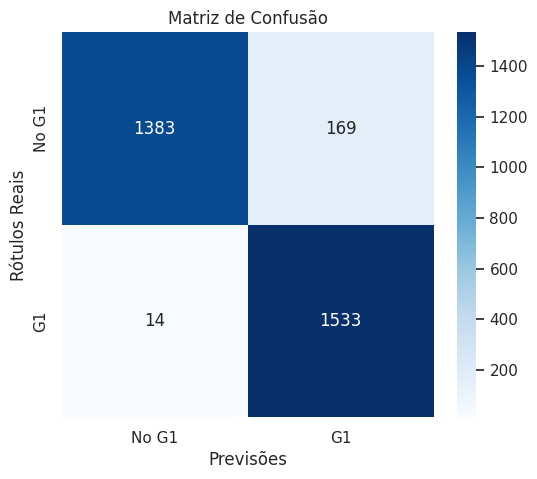

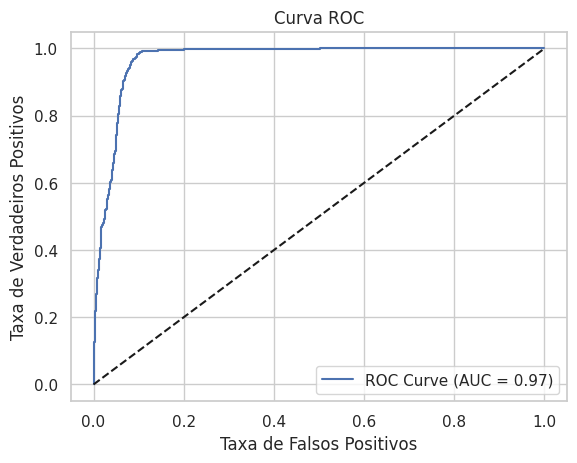

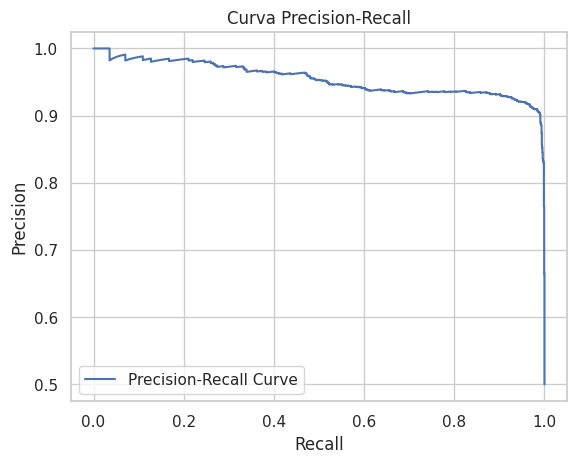

In [19]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
from sklearn.metrics import precision_recall_curve

# Avaliação no conjunto de teste
model.eval()
all_predictions = []
all_labels = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        outputs = model(X_batch)
        predictions = torch.argmax(outputs, dim=1)
        all_predictions.extend(predictions.cpu().numpy())
        all_labels.extend(y_batch.cpu().numpy())

# Relatório de classificação
print("Relatório de Classificação:")
print(classification_report(all_labels, all_predictions))

# Matriz de confusão
cm = confusion_matrix(all_labels, all_predictions)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No G1", "G1"], yticklabels=["No G1", "G1"])
plt.xlabel("Previsões")
plt.ylabel("Rótulos Reais")
plt.title("Matriz de Confusão")
plt.show()

# Curva ROC
fpr, tpr, _ = roc_curve(all_labels, [p[1] for p in model(torch.tensor(X_test, dtype=torch.float32).to(device)).detach().cpu().numpy()])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("Taxa de Falsos Positivos")
plt.ylabel("Taxa de Verdadeiros Positivos")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.show()


# Curva Precision-Recall
precision, recall, _ = precision_recall_curve(all_labels, [p[1] for p in model(torch.tensor(X_test, dtype=torch.float32).to(device)).detach().cpu().numpy()])
plt.figure()
plt.plot(recall, precision, label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Curva Precision-Recall")
plt.legend(loc="lower left")
plt.show()

